In [25]:
"""
Perform NB on text data: Champion = features, Position = class.

Will be using sklearn functions to use for the NB model for my text data classification
"""

#import packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#import text data dataset
text_path = "../../data/cleaned_riot_data/combined_text_data_cleaned.csv"
text_df = pd.read_csv(text_path, index_col=None)

In [7]:
"""
Clean data a bit: remove rank column, lower case champion names
"""
#remove rank column
text_df = text_df.drop('rank', axis=1)
text_df['champion'] = text_df['champion'].str.lower()

In [9]:
"""
Split the data up and get training and testing for x (features/champion) and y (target/position).

Since this text data is somewhat irrelevant to general project idea, I will only include training and testing sets.
"""

#split for training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(text_df['champion'], text_df['position'], test_size=0.2, random_state=42)


In [10]:
"""
Now Vectorize, transform, and fit
"""

#use CountVectorizer() for features
vectorize = CountVectorizer()

#learns and transform text into numerical from x_train
x_train_vectorize = vectorize.fit_transform(x_train)

#transform text into numerical for x_test
x_test_vectorize = vectorize.transform(x_test)

In [17]:
"""
Apply Multinomial Naive Bayes classifier as this is text data. Then make predictions with Test data.
"""
#train the NB model with MultinomialNB() with training dataset
nb_model = MultinomialNB()
nb_model.fit(x_train_vectorize, y_train)

#make predictions for train and test data
train_preds = nb_model.predict(x_train_vectorize)
test_preds = nb_model.predict(x_test_vectorize)

In [24]:
"""
Get accuracy from training and testing, precision, recall, and 
f1-score for testing from trained model.
"""
train_accuracy = metrics.accuracy_score(y_train, train_preds)
test_accuracy = metrics.accuracy_score(y_test, test_preds)

precision = metrics.precision_score(y_test, test_preds, average = 'weighted')
recall = metrics.recall_score(y_test, test_preds, average = 'weighted')
f1 = metrics.f1_score(y_test, test_preds, average = 'weighted')

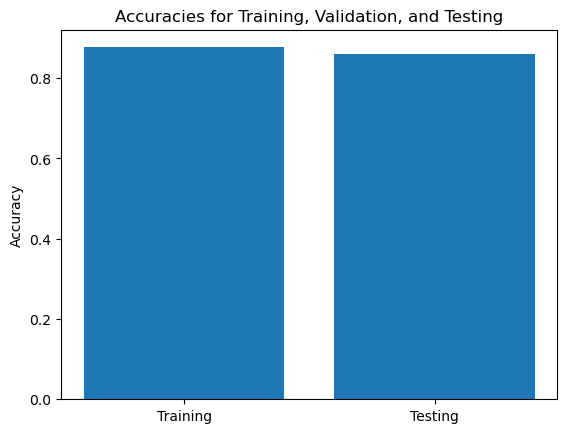

In [35]:
"""
Plot training and testing accuracies
"""

#group the found values first
accuracies_arr = np.array([train_accuracy, test_accuracy])
#plot the accuracies from all three sets (training, validation, and testing sets)
plt.bar(['Training','Testing'], accuracies_arr)
plt.title('Accuracies for Training, Validation, and Testing')
plt.ylabel('Accuracy')

#save plot as jpg
plt.savefig('accuracies_text.png')

plt.show()

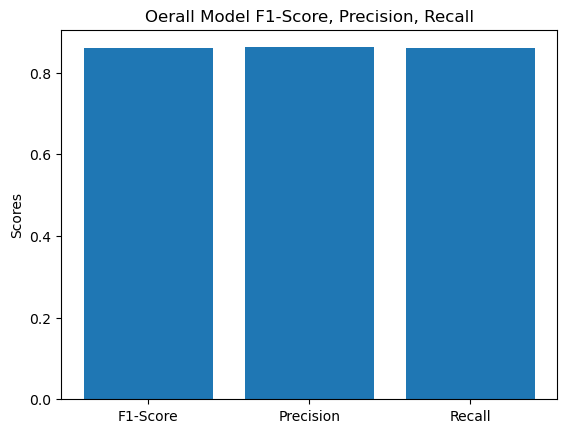

In [36]:
"""
plot overall f1, precision, and recall together
"""
#group precision and recall together
grouped_metrics = np.array([f1, precision, recall])

#plot bar plot for precision and recall for all classes (ranks)
plt.bar(['F1-Score','Precision', 'Recall'], grouped_metrics)

plt.title('Oerall Model F1-Score, Precision, Recall')
plt.ylabel('Scores')
#save plot
plt.savefig('f1_prec_recall_text.png')

plt.show()

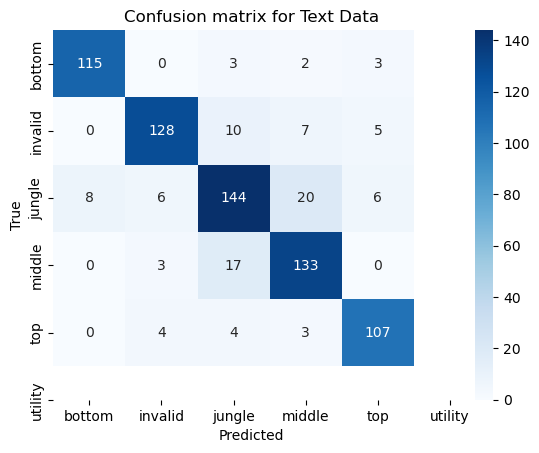

In [27]:
"""
Also get/plot confusion matrix
"""

#get the confusion matrix first
conf_matrix = metrics.confusion_matrix(y_test, test_preds)
#plot confusion matrix
plt.title("Confusion matrix for Text Data")
axis = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
axis.set(xlabel="Predicted", ylabel="True")
#save confusion matrix as .png
plt.savefig('conf_matrix_text.png')
plt.show()